The history saving thread hit an unexpected error (OperationalError('database or disk is full')).History will not be written to the database.


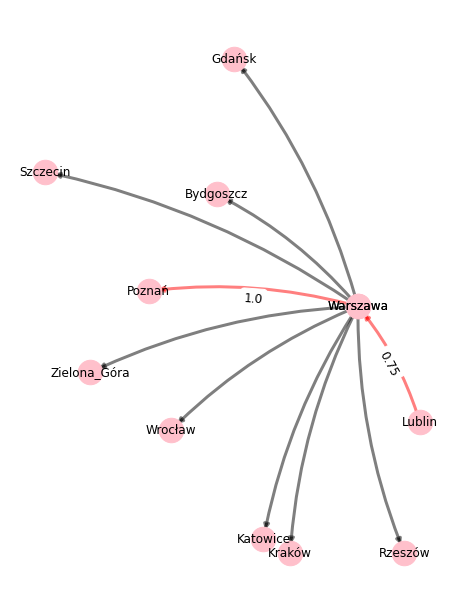

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

# Cities
nodes = {'Gdańsk', 'Szczecin', 'Bydgoszcz', 'Poznań', 'Zielona_Góra', 'Warszawa', 'Wrocław','Katowice','Kraków','Rzeszów','Lublin'}

# Create graph with cities and capacity - that is time of flight between one city and another
G = nx.DiGraph()
G.add_edge('Warszawa', 'Gdańsk', capacity = 1)
G.add_edge('Warszawa', 'Szczecin', capacity = 1.2)
G.add_edge('Warszawa', 'Bydgoszcz', capacity = 0.75)
G.add_edge('Warszawa', 'Zielona_Góra', capacity = 1.16)
G.add_edge('Warszawa', 'Wrocław', capacity = 1)
G.add_edge('Warszawa', 'Katowice', capacity = 1)
G.add_edge('Warszawa', 'Kraków', capacity = 0.83)
G.add_edge('Warszawa', 'Rzeszów', capacity = 0.92)

# Create graph in a diffrent colo r
X = nx.DiGraph()
X.add_edge('Lublin','Warszawa', capacity = 0.75)
X.add_edge('Warszawa', 'Poznań', capacity = 1.0)

# Geographical coordinates for every of cities
pozycje = dict(Warszawa=(21.02,52.12), Gdańsk=(18.38,54.22), Szczecin=(14.34,53.26), Bydgoszcz=(18.00,53.07), Poznań=(16.55,52.25), Zielona_Góra=(15.30,51.56),Wrocław=(17.02,51.07), Katowice=(19.00,50.15), Kraków=(19.57,50.03), Rzeszów=(22.01,50.03), Lublin=(22.34,51.14))

capacity = nx.get_edge_attributes(G,'capacity')
capacity = nx.get_edge_attributes(X,'capacity')

# Draw a graph
plt.figure(figsize=(8,11))
nx.draw_networkx_nodes(G,pozycje,node_size=600, node_color='pink')
nx.draw_networkx_labels(G,pozycje)
nx.draw_networkx_edges(G,pozycje, connectionstyle='arc3,rad = 0.1',width=3,alpha=0.5,edge_color='black')
nx.draw_networkx_edge_labels(G,pozycje,edge_labels=capacity,label_pos=0.5,font_size=12)
nx.draw_networkx_nodes(X,pozycje,node_size=600, node_color='pink')
nx.draw_networkx_labels(X,pozycje)
nx.draw_networkx_edges(X,pozycje, connectionstyle='arc3,rad = 0.1',width=3,alpha=0.5,edge_color='red')
nx.draw_networkx_edge_labels(X,pozycje,edge_labels=capacity,label_pos=0.5,font_size=12)
plt.axis('off');

In [2]:
# Display all connections with cities and their capacity
print(list(G.edges(data = True))) 

[('Warszawa', 'Gdańsk', {'capacity': 1}), ('Warszawa', 'Szczecin', {'capacity': 1.2}), ('Warszawa', 'Bydgoszcz', {'capacity': 0.75}), ('Warszawa', 'Zielona_Góra', {'capacity': 1.16}), ('Warszawa', 'Wrocław', {'capacity': 1}), ('Warszawa', 'Katowice', {'capacity': 1}), ('Warszawa', 'Kraków', {'capacity': 0.83}), ('Warszawa', 'Rzeszów', {'capacity': 0.92})]


In [3]:
# Maximum flow capacity
flow_value, flow_dict = nx.maximum_flow(X, 'Lublin', 'Poznań')
flow_value

0.75